In [0]:
import pandas as pd
import numpy as np
import scipy.stats as st

## Begin:

In [3]:
titanic_url_path = 'https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/13.%20Decision%20Trees/titanic.csv'
titanic_dataFrame = pd.read_csv(titanic_url_path)
titanic_dataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
to_drop = ['PassengerId',
          'Name',
          'Parch',
          'Ticket',
           'Cabin',
          'Embarked']

titanic_dataFrame.drop(columns=to_drop, inplace=True)

In [5]:
for x in titanic_dataFrame.columns:
    print(x)
    print(titanic_dataFrame[x].isnull().values.any())


#titanic_dataFrame['Age'].fillna(np.mean(titanic_dataFrame['Age']))

Survived
False
Pclass
False
Sex
False
Age
True
SibSp
False
Fare
False


In [0]:
titanic_dataFrame['Age'].fillna(np.mean(titanic_dataFrame['Age']), inplace=True)

-------------------------------------------------------------------------------------------------------------------------------

In [7]:
titanic_dataFrame.describe()

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,13.002015,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [8]:
titanic_dataFrame.replace(['female','male'], [0,1], inplace=True)
titanic_dataFrame.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500


In [0]:
x,y = titanic_dataFrame.iloc[:,1:],titanic_dataFrame.iloc[:,:1]

In [0]:
import sklearn.model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(x,y,test_size=0.2)

In [0]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [0]:
model = dtc(criterion='entropy', random_state=1, max_depth=4)
model1 = dtc(criterion='gini', random_state=1, max_depth=5)

In [36]:
model.fit(x_train, y_train)
model1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [39]:
model.score(x_train,y_train)
model1.score(x_train,y_train)

0.8525280898876404

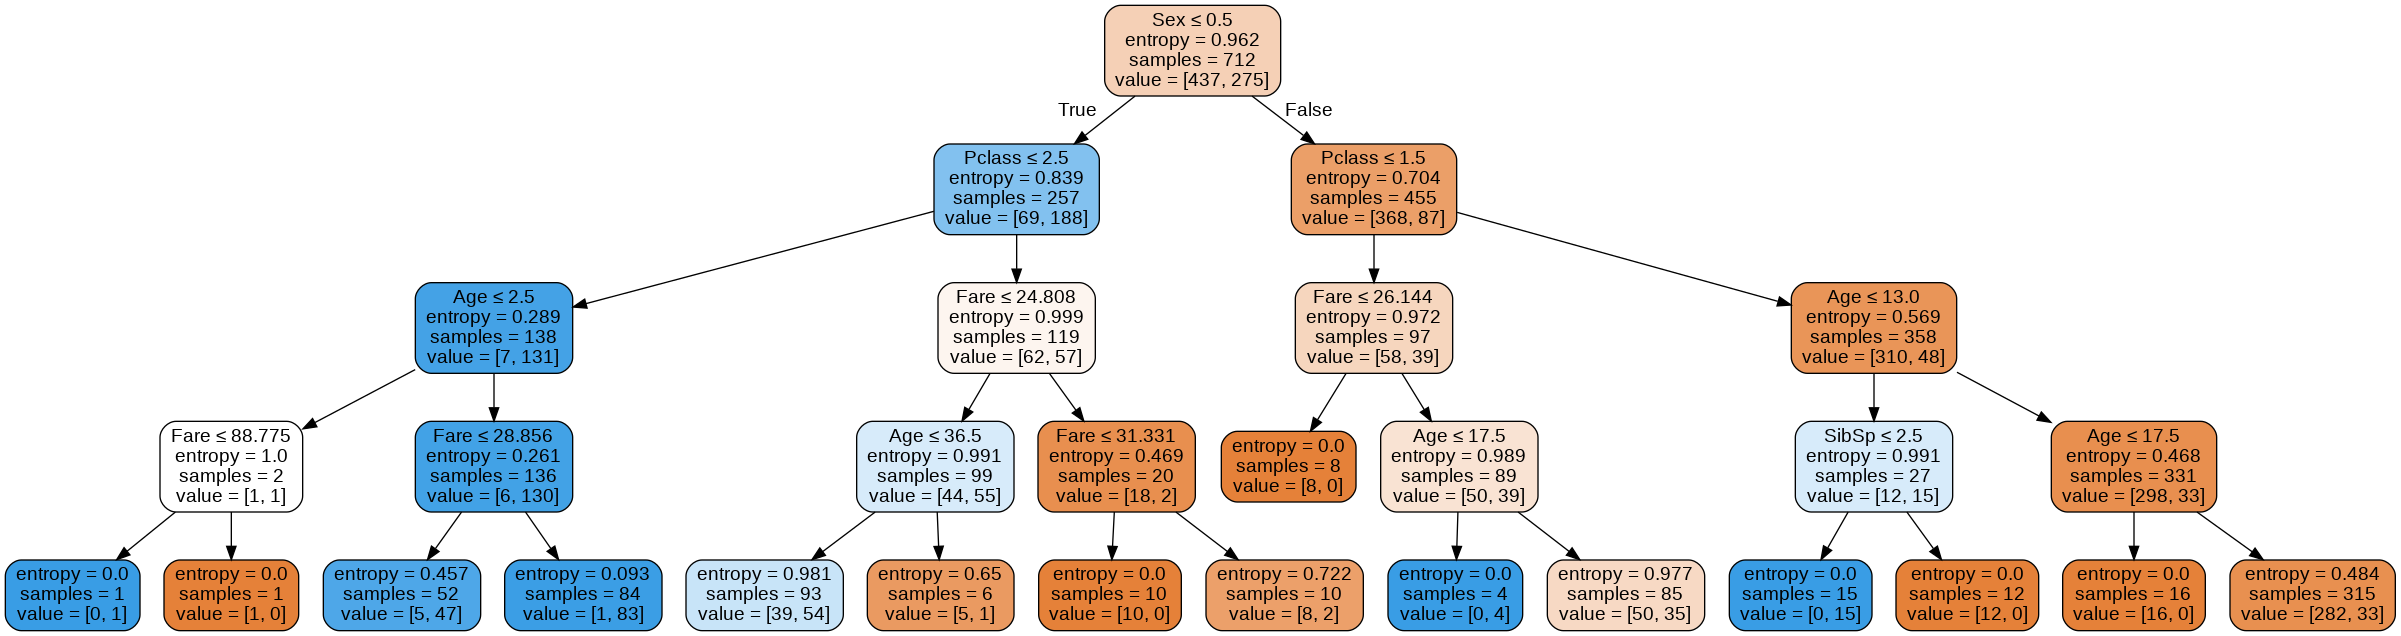

In [40]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

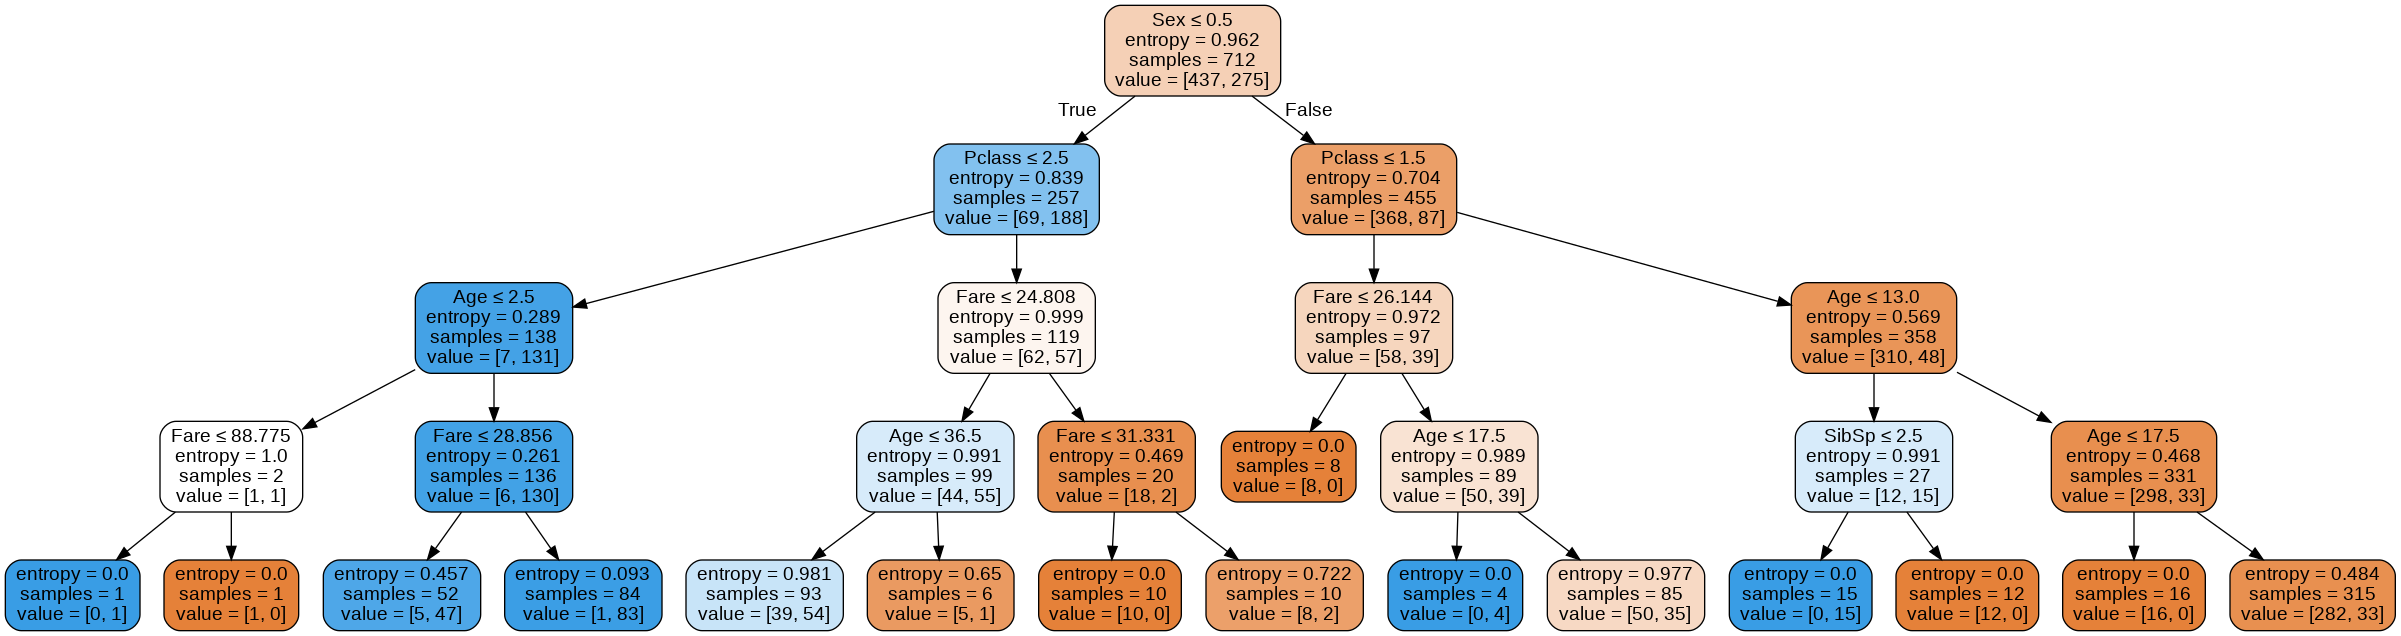

In [41]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [47]:
print(f'Model with depth=4: {model.score(x_train,y_train)}\nModel with depth=5: {model1.score(x_train,y_train)}')
print(f'Model with depth=4: {model.score(x_test,y_test)}\nModel with depth=5: {model1.score(x_test,y_test)}')

Model with depth=4: 0.8370786516853933
Model with depth=5: 0.8525280898876404
Model with depth=4: 0.8379888268156425
Model with depth=5: 0.8379888268156425


Model with depth of 5 is more suitable compared with the model with depth of 4.

In [51]:
data1 = pd.read_csv('fifa19_data.csv')

data1.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13.0,5.0,10.0,13.0,€196.4M


In [0]:
x_features = data1[['Age','Potential','Wage','BallControl','SprintSpeed','Agility','GKHandling']]
y = data1['Release Clause']

In [58]:
x_features.isnull().any()
x_features['GKHandling'].fillna(np.mean(x_features['GKHandling']),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [60]:
x_features.describe()

,Age,Potential,BallControl,SprintSpeed,Agility,GKHandling
count,12487.00000,12487.000000,12487.000000,12487.000000,12487.000000,12487.000000
mean,26.48106,73.026508,62.433891,66.391287,65.656523,15.986545
std,4.24818,5.620352,15.552820,14.145771,14.327483,16.899510
min,16.00000,63.000000,5.000000,13.000000,14.000000,1.000000
25%,23.00000,69.000000,60.000000,59.000000,58.000000,8.000000
50%,26.00000,72.000000,66.000000,69.000000,68.000000,11.000000
75%,29.00000,77.000000,71.000000,76.000000,76.000000,14.000000
max,45.00000,95.000000,96.000000,96.000000,96.000000,92.000000
